Feature engineering 

#### Normalization

In [94]:
import numpy as np
from sklearn import preprocessing

In [95]:
feature = np.array([[-500.5], [-100.1], [0], [100.1], [900.9]])

feature

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.9]])

In [96]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

minmax_scale

MinMaxScaler()

In [97]:
scaled_feature = minmax_scale.fit_transform(feature)

scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

Standardization

(mostly preferred)

here average is 0 & standard deviation is 1

In [98]:
import numpy as np
from sklearn import preprocessing

In [99]:
x = np.array([[-1000.1], [-200.2], [500.5], [600.6], [9000.9]])

x

array([[-1000.1],
       [ -200.2],
       [  500.5],
       [  600.6],
       [ 9000.9]])

In [100]:
scaler = preprocessing.StandardScaler()

scaler

StandardScaler()

In [101]:
standardized = scaler.fit_transform(x)

standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

standardization => distance based

### Outliers

In [102]:
import pandas as pd

In [103]:
df = pd.read_csv('./Practice_File.csv', usecols=['LotArea', 'SalePrice'])

df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [104]:
df.describe()

,LotArea,SalePrice
count,1460.000000,1460.000000
mean,10516.828082,180921.195890
std,9981.264932,79442.502883
min,1300.000000,34900.000000
25%,7553.500000,129975.000000
50%,9478.500000,163000.000000
75%,11601.500000,214000.000000
max,215245.000000,755000.000000


In [105]:
df.isna().sum()

LotArea      0
SalePrice    0
dtype: int64

In [106]:
df.shape

(1460, 2)

Outlier detection - IQR (Inter-Quantile Range)

In [107]:
q1 = df['SalePrice'].quantile(.25)
q3 = df['SalePrice'].quantile(.75)

iqr = q3 - q1

print('q1 : ', q1)
print('q3 : ', q3)
print('IQR : ', iqr)

q1 :  129975.0
q3 :  214000.0
IQR :  84025.0


In [108]:
lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)

print('lower whisker : ', lower_whisker)
print('upper whisker : ', upper_whisker)

lower whisker :  3937.5
upper whisker :  340037.5


In [109]:
print((df['SalePrice'] < lower_whisker) | (df['SalePrice'] > upper_whisker))

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool


In [110]:
# outlier calculation

new_df = df[(df['SalePrice'] > lower_whisker) & (df['SalePrice'] < upper_whisker)]

new_df.shape

(1399, 2)

In [111]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)

iqr = q3 - q1

print('q1 : ')
print(q1)
print('q3 : ')
print(q3)
print('IQR : ')
print(iqr)

q1 : 
LotArea        7553.5
SalePrice    129975.0
Name: 0.25, dtype: float64
q3 : 
LotArea       11601.5
SalePrice    214000.0
Name: 0.75, dtype: float64
IQR : 
LotArea       4048.0
SalePrice    84025.0
dtype: float64


In [112]:
lower_whisker = q1 - (1.5 * iqr)
upper_whisker = q3 + (1.5 * iqr)

print('lower whisker : ', lower_whisker)
print('upper whisker : ', upper_whisker)

lower whisker :  LotArea      1481.5
SalePrice    3937.5
dtype: float64
upper whisker :  LotArea       17673.5
SalePrice    340037.5
dtype: float64


In [113]:
1460 - 1391

69

In [114]:
# outlier calculation

new_df_2 = df[(df['SalePrice'] > lower_whisker['SalePrice']) & (df['SalePrice'] < upper_whisker['SalePrice'])]

new_df_2.shape

(1399, 2)

In [115]:
new_df_2 = df[(df['LotArea'] > lower_whisker['LotArea']) & (df['LotArea'] < upper_whisker['LotArea'])]

new_df_2.shape

(1391, 2)

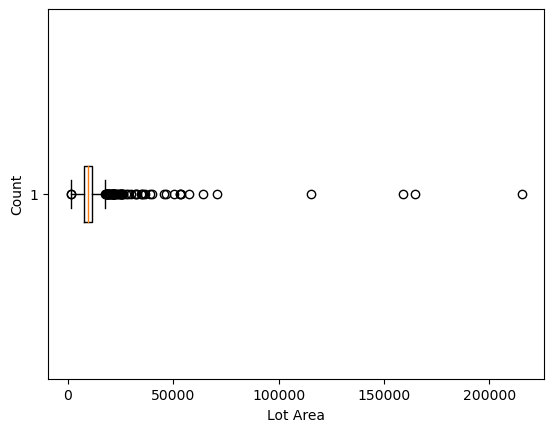

In [116]:
import matplotlib.pyplot as plt

plt.boxplot(df['LotArea'], vert=False)
plt.xlabel('Lot Area')
plt.ylabel('Count')
plt.show()

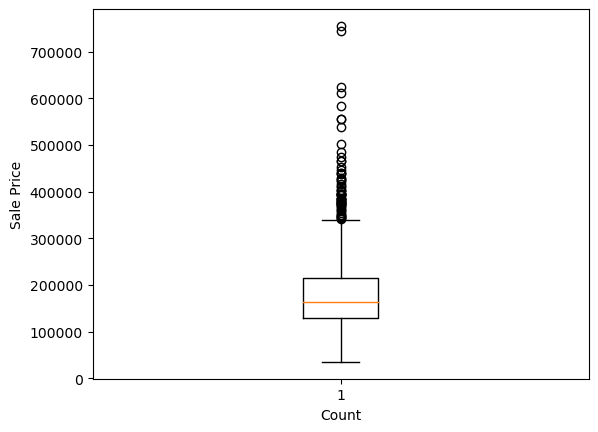

In [117]:
plt.boxplot(df['SalePrice'], vert=True)
plt.ylabel('Sale Price')
plt.xlabel('Count')
plt.show()

<Axes: >

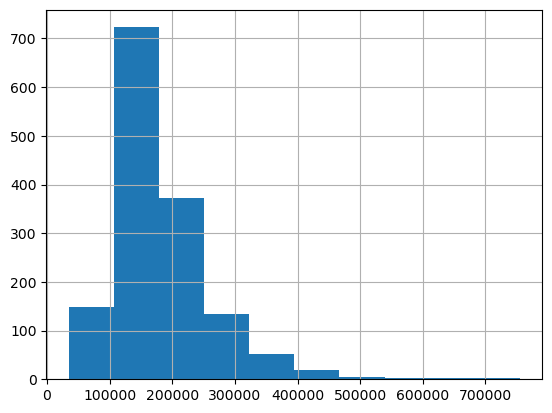

In [118]:
df['SalePrice'].hist()

# right skewed

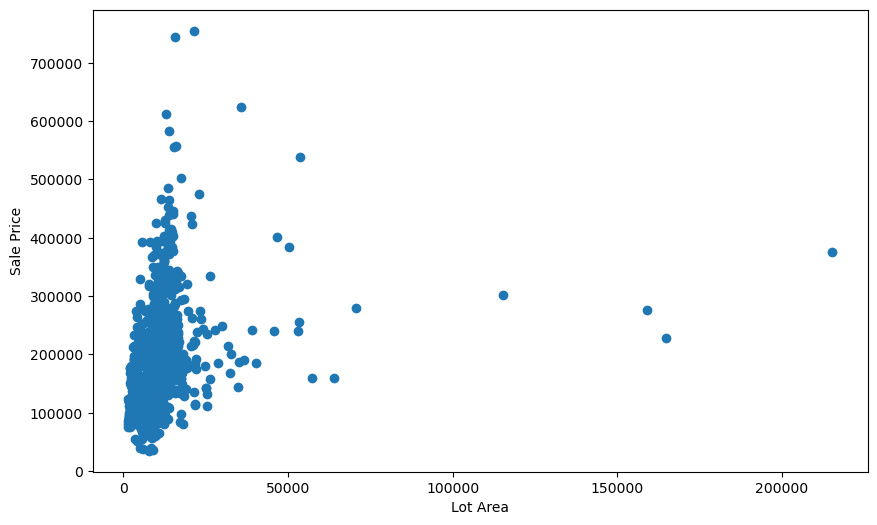

In [119]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['LotArea'], df['SalePrice'])
ax.set_xlabel('Lot Area')
ax.set_ylabel('Sale Price')
plt.show()

Quantile-based Flooring and Capping

find the min & max acceptable values and cap 

replace values < min or > max with min & max respectively

In [120]:
floor = df['SalePrice'].quantile(.01)
ceil = df['SalePrice'].quantile(.99)

print('floor: ', floor)
print('ceil: ', ceil)

floor:  61815.97
ceil:  442567.01000000053


In [121]:
import numpy as np

df1 = df.copy()
df1['SalePrice'] = np.where(df1['SalePrice'] < floor, floor, df1['SalePrice'])
df1['SalePrice'] = np.where(df1['SalePrice'] > ceil, ceil, df1['SalePrice'])

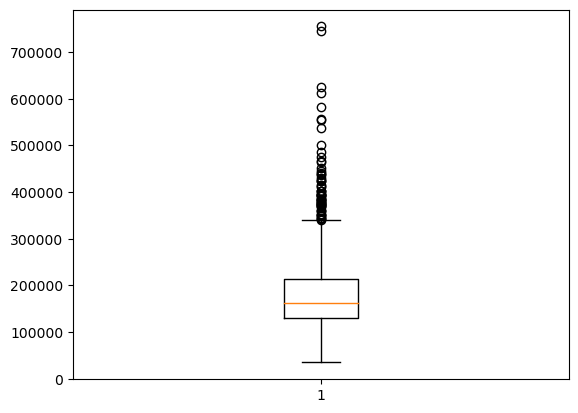

In [122]:
plt.boxplot(df['SalePrice'])
plt.show()

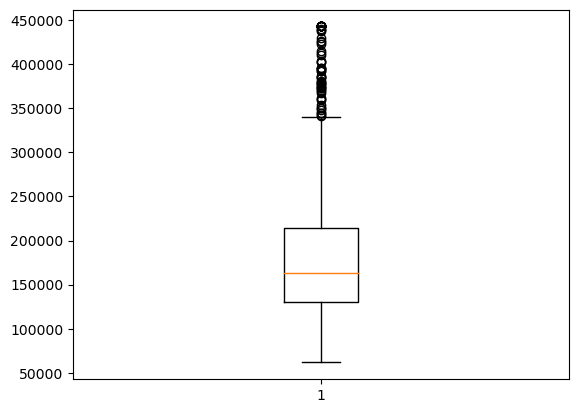

In [123]:
plt.boxplot(df1['SalePrice'])
plt.show()

Trimming -> delete / remove outliers from dataframe

In [126]:
df2 = df.copy()
print('Number of records in the table : ', df.shape)

index = df2[(df['SalePrice'] > upper_whisker) | (df['SalePrice'] < lower_whisker)].index

index.shape

Number of records in the table :  (1460, 2)


ValueError: Can only compare identically-labeled Series objects

In [ ]:
df2.drop(index, inplace=True)
df2.shape

Log Transformation (common and best method)

In [130]:
print(df['SalePrice'].skew().round(2))

1.88


In [132]:
# my method
df['log_sale_2'] = df['SalePrice'].apply(np.log)

print((df['log_sale_2'].skew().round(2)))

0.12


In [131]:
df['log_sale'] = df['SalePrice'].map(lambda i: np.log(i) if i > 0 else 0)

print((df['log_sale'].skew().round(2)))

0.12


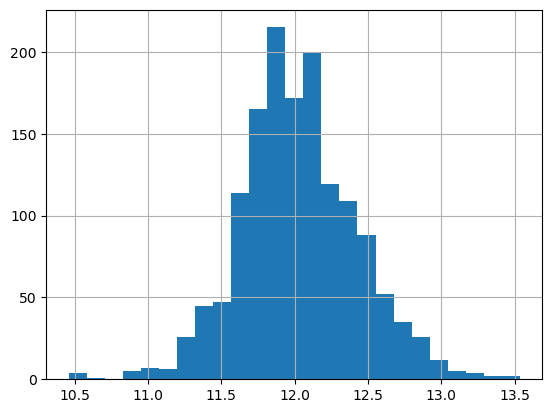

In [142]:
df['log_sale'].hist(bins=25)
plt.show()

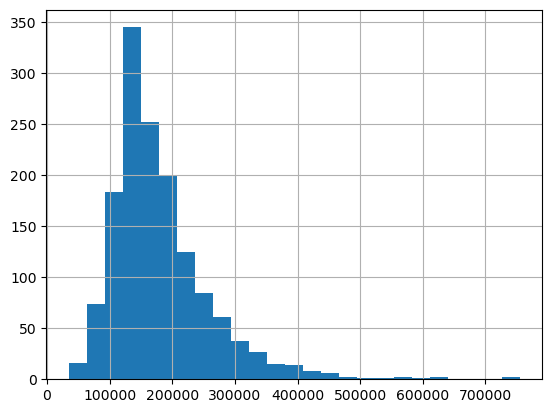

In [137]:
df['SalePrice'].hist(bins=25)
plt.show()

Discretization 

transform continuous variables to discrete form

using `Binarizer`

In [1]:
import numpy as np
from sklearn.preprocessing import Binarizer

In [10]:
age = np.array([[6], [12], [18], [20], [36], [65]])

In [8]:
binarizer = Binarizer(threshold=18)

In [9]:
binarizer.fit_transform(age)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

using `digitize`

In [11]:
import numpy as np

In [16]:
age = np.array([[6], [12], [20], [30], [36], [64], [65]])

In [20]:
np.digitize(age, bins=[20, 30, 64])

array([[0],
       [0],
       [1],
       [2],
       [2],
       [3],
       [3]])

In [ ]:
# how many pins
# below 20 -> 2
# 20-30 -> 1
# 30-64 -> 1
# more 64 -> 1